<a href="https://colab.research.google.com/github/patroswastik/Stock-Market-Predictor/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime

In [ ]:
# dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)
dataset = web.DataReader("NYKAA.NS","yahoo", "2018-05-18")
# dataset = web.DataReader('NYKAA.NS','yahoo',"2012-03-19","2022-07-19")

In [ ]:
dataset.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-03-19,391.500000,375.549988,390.500000,377.549988,7304896.0,329.820404
2012-03-20,383.200012,375.149994,378.049988,380.274994,4779840.0,332.200958
2012-03-21,386.750000,377.549988,380.000000,384.024994,6497096.0,335.476868
2012-03-22,385.725006,366.000000,382.950012,368.174988,13369316.0,321.630585
2012-03-23,374.750000,369.049988,371.899994,372.024994,12323672.0,324.993896


In [ ]:
dataset.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1519 entries, 2012-03-19 to 2018-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1519 non-null   float64
 1   Low        1519 non-null   float64
 2   Open       1519 non-null   float64
 3   Close      1519 non-null   float64
 4   Volume     1519 non-null   float64
 5   Adj Close  1519 non-null   float64
dtypes: float64(6)
memory usage: 83.1 KB


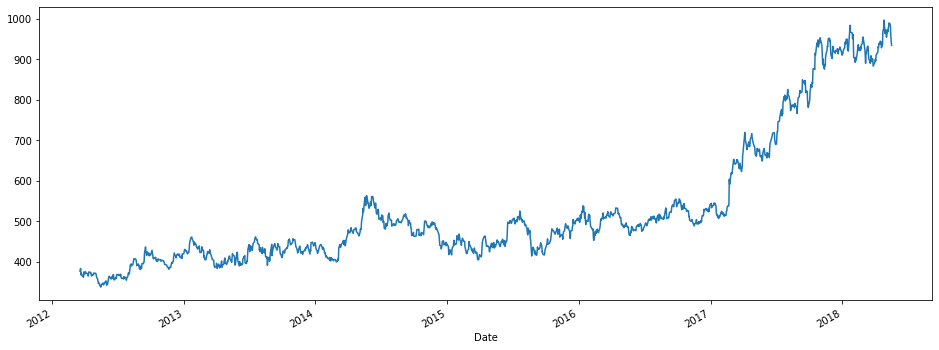

In [ ]:
dataset['Close'].plot(figsize=(16,6))

In [ ]:
# convert column "a" of a DataFrame
# dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)


In [ ]:
# dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [ ]:
# 7 day rolling mean
# dataset.rolling(7).mean().head(20)

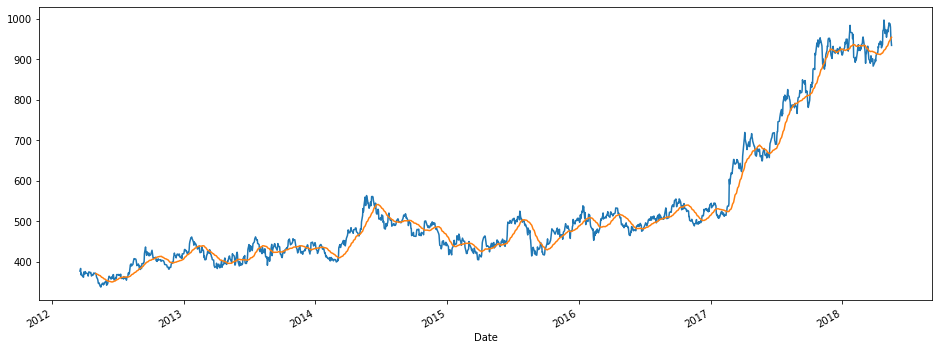

In [ ]:
dataset['Close'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

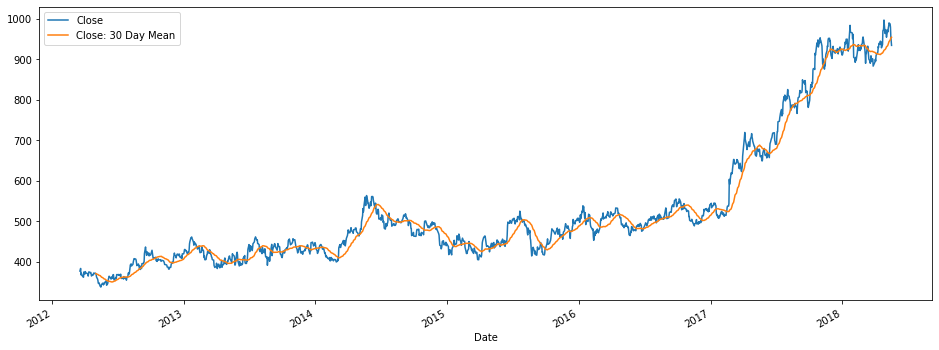

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

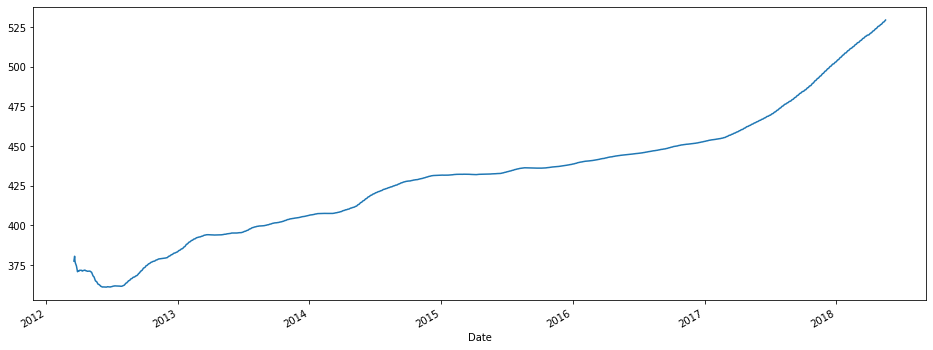

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
training_set=dataset['Close']
training_set=pd.DataFrame(training_set)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split=0.25)


Train on 1094 samples, validate on 365 samples
Epoch 1/100
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0053 - val_loss: 0.0448
Epoch 2/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0015 - val_loss: 0.0197
Epoch 3/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0015 - val_loss: 0.0133
Epoch 4/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0013 - val_loss: 0.0266
Epoch 5/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0011 - val_loss: 0.0129
Epoch 6/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0011 - val_loss: 0.0163
Epoch 7/100
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0010 - val_loss: 0.0077
Epoch 8/100
1094/1094 [==============================] - 5s 5ms/step - loss: 9.7423e-04 - val_loss: 0.0210
Epoch 9/100
1094/1094 [==============================] - 5s 5ms/step - loss: 8.8096e-04 - val_loss: 0.0273
Epoch 10/100
1094/

In [ ]:
X_train.shape[1]

60

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
dataset_test = web.DataReader('RELIANCE.NS','yahoo','2018-05-19')


In [ ]:
real_stock_price = dataset_test['Close'].values

In [ ]:
dataset_test.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-21,935.700012,922.099976,930.750000,931.349976,6624893.0,920.543945
2018-05-22,934.000000,925.000000,933.150024,926.750000,5170585.0,915.997375
2018-05-23,926.000000,909.150024,926.000000,912.250000,4567562.0,901.665588
2018-05-24,921.000000,910.150024,914.000000,915.849976,5317983.0,905.223755
2018-05-25,923.400024,914.450012,916.000000,920.799988,8129520.0,910.116333


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 486 entries, 2018-05-21 to 2020-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       486 non-null    float64
 1   Low        486 non-null    float64
 2   Open       486 non-null    float64
 3   Close      486 non-null    float64
 4   Volume     486 non-null    float64
 5   Adj Close  486 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


In [ ]:
# dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=dataset_test['Close']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 486 entries, 2018-05-21 to 2020-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   486 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       486 non-null    float32
dtypes: float32(1)
memory usage: 2.0 KB


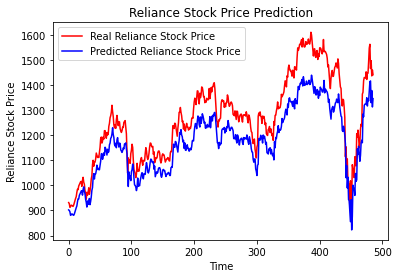

In [ ]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Reliance Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Reliance Stock Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()


In [ ]:
from fbprophet import Prophet

In [ ]:
DataFrame = pd.DataFrame({"ds":dataset.index,"y":dataset['Close']})

In [ ]:
m=Prophet()

In [ ]:
m.fit(DataFrame)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

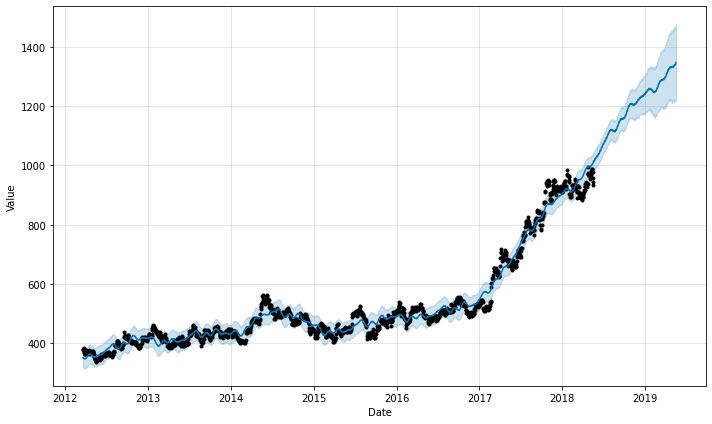

In [ ]:
figure=m.plot(forecast,xlabel="Date",ylabel="Value")

In [ ]:
manual_dataset = pd.DataFrame({"Date":pd.date_range(start="2020-05-18",periods=15),"Close":0})

In [ ]:
manual_dataset.set_index(manual_dataset.Date)

,Date,Close
Date,,
2020-05-18,2020-05-18,0
2020-05-19,2020-05-19,0
2020-05-20,2020-05-20,0
2020-05-21,2020-05-21,0
2020-05-22,2020-05-22,0
2020-05-23,2020-05-23,0
2020-05-24,2020-05-24,0
2020-05-25,2020-05-25,0
2020-05-26,2020-05-26,0
